<a href="https://colab.research.google.com/github/ThanakornMix/G1-Consulting-Data-Science/blob/main/Consulting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [315]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import networkx as nx
from collections import defaultdict
from matplotlib import cm

### Data Loading

In [317]:
#Data Loading

articles = pd.read_csv('/content/drive/MyDrive/Group 1/articles.CDKN2A.csv')
authors = pd.read_csv('/content/drive/MyDrive/Group 1/authors.CDKN2A.csv')
paper_counts = pd.read_csv('/content/drive/MyDrive/Group 1/paper_counts.csv')

In [318]:
articles.head()

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation
0,10551774,Transfection of an inducible p16/CDKN2A constr...,Recent studies have shown that methylation of ...,0888-8809,"Molecular endocrinology (Baltimore, Md.)",(13) 1801-10,1999,S J,Frost,SJ,"Centre for Cell and Molecular Medicine, School..."
1,10595918,Malignant transformation of neurofibromas in n...,Patients with neurofibromatosis 1 (NF1) are pr...,0002-9440,The American journal of pathology,(155) 1879-84,1999,G P,Nielsen,GP,Molecular Neuro-Oncology Laboratory and the Ja...
2,10620111,Genotype/phenotype and penetrance studies in m...,Patients with a family history of melanoma are...,0022-202X,The Journal of investigative dermatology,(114) 28-33,2000,J A,Bishop,JA,"ICRF Genetic Epidemiology Laboratory, Leeds, U..."
3,10630172,The genetics of hereditary melanoma and nevi. ...,Although the first English-language report of ...,0008-543X,Cancer,(86) 2464-77,1999,M H,Greene,MH,"Division of Hematology/Oncology, Mayo Clinic S..."
4,10632344,Analysis of oncogene and tumor suppressor gene...,Although common among adult intracranial neopl...,1078-0432,Clinical cancer research : an official journal...,(5) 4085-90,1999,C,Raffel,C,"Department of Neurosurgery, Mayo Clinic and Fo..."


In [319]:
authors.head()

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation
0,10551774,1,S J,Frost,SJ,"Centre for Cell and Molecular Medicine, School..."
1,10551774,2,D J,Simpson,DJ,NaN
2,10551774,3,R N,Clayton,RN,NaN
3,10551774,4,W E,Farrell,WE,NaN
4,10595918,1,G P,Nielsen,GP,Molecular Neuro-Oncology Laboratory and the Ja...


In [320]:
paper_counts.head()

,Year,Count
0,1799,1
1,1801,1
2,1802,1
3,1805,1
4,1866,1


### Data Cleaning

In [321]:
# Data Cleaning: Handle Missing Values and Remove Duplicates
# Handle missing values in `authors_df`
authors['AuthorForename'].fillna('Unknown', inplace=True)
authors['AuthorInitials'].fillna('Unknown', inplace=True)
authors.dropna(subset=['AuthorLastname'], inplace=True)

<ipython-input-321-dcf0bb612f25>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  authors['AuthorForename'].fillna('Unknown', inplace=True)
<ipython-input-321-dcf0bb612f25>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [322]:
# Handle missing values in `articles_df`
articles.fillna({
    'Location': 'Unknown',
    'FirstAuthorForename': 'Unknown',
    'FirstAuthorLastname': 'Unknown',
    'FirstAuthorInitials': 'Unknown',
    'FirstAuthorAffiliation': 'Unknown'
}, inplace=True)

In [323]:
# Remove duplicates
articles.drop_duplicates(inplace=True)
authors.drop_duplicates(inplace=True)
paper_counts.drop_duplicates(inplace=True)

In [324]:
#checking for missing values
print(articles.isnull().sum())
print(authors.isnull().sum())
print(paper_counts.isnull().sum())

PMID                      0
Title                     0
Abstract                  0
ISSN                      0
Journal                   0
Location                  0
Year                      0
FirstAuthorForename       0
FirstAuthorLastname       0
FirstAuthorInitials       0
FirstAuthorAffiliation    0
dtype: int64
PMID                     0
AuthorN                  0
AuthorForename           0
AuthorLastname           0
AuthorInitials           0
AuthorAffiliation    13123
dtype: int64
Year     0
Count    0
dtype: int64


In [325]:
# Data Manipulation: Merge and Create Unique Identifiers
# Merge `authors_df` and `articles_df` on `PMID`
merged_df = pd.merge(authors, articles, on='PMID', how='inner')

In [326]:
# Create a unique identifier for researchers
merged_df['ResearcherID'] = merged_df['AuthorLastname'] + '_' + merged_df['AuthorInitials']
merged_df.head()

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation,ResearcherID
0,10551774,1,S J,Frost,SJ,"Centre for Cell and Molecular Medicine, School...",Transfection of an inducible p16/CDKN2A constr...,Recent studies have shown that methylation of ...,0888-8809,"Molecular endocrinology (Baltimore, Md.)",(13) 1801-10,1999,S J,Frost,SJ,"Centre for Cell and Molecular Medicine, School...",Frost_SJ
1,10551774,2,D J,Simpson,DJ,NaN,Transfection of an inducible p16/CDKN2A constr...,Recent studies have shown that methylation of ...,0888-8809,"Molecular endocrinology (Baltimore, Md.)",(13) 1801-10,1999,S J,Frost,SJ,"Centre for Cell and Molecular Medicine, School...",Simpson_DJ
2,10551774,3,R N,Clayton,RN,NaN,Transfection of an inducible p16/CDKN2A constr...,Recent studies have shown that methylation of ...,0888-8809,"Molecular endocrinology (Baltimore, Md.)",(13) 1801-10,1999,S J,Frost,SJ,"Centre for Cell and Molecular Medicine, School...",Clayton_RN
3,10551774,4,W E,Farrell,WE,NaN,Transfection of an inducible p16/CDKN2A constr...,Recent studies have shown that methylation of ...,0888-8809,"Molecular endocrinology (Baltimore, Md.)",(13) 1801-10,1999,S J,Frost,SJ,"Centre for Cell and Molecular Medicine, School...",Farrell_WE
4,10595918,1,G P,Nielsen,GP,Molecular Neuro-Oncology Laboratory and the Ja...,Malignant transformation of neurofibromas in n...,Patients with neurofibromatosis 1 (NF1) are pr...,0002-9440,The American journal of pathology,(155) 1879-84,1999,G P,Nielsen,GP,Molecular Neuro-Oncology Laboratory and the Ja...,Nielsen_GP


### Most active researchers

In [327]:
# Count the number of papers each researcher has been involved in
author_counts = merged_df['ResearcherID'].value_counts().reset_index()
author_counts.columns = ['ResearcherID', 'Count']
# Sort into descending order
author_counts = author_counts.sort_values(by='Count', ascending=False)
most_published_authors = author_counts.head(15)
most_published_authors = pd.DataFrame(most_published_authors)

# Display the dataframe
display(most_published_authors)

,ResearcherID,Count
0,Goldstein_AM,62
1,Wang_Y,58
2,Tucker_MA,49
3,Zhang_Y,45
4,Hayward_NK,44
5,Wang_J,41
6,Ghiorzo_P,39
7,Liu_Y,38
8,Li_J,37
9,Li_Y,36


### Collaboration Patterns

In [328]:
# create dataframes
df_coauthored = []
df_no_coauthored = []

# get the researcherID of the most published authors
top_15_authors = most_published_authors['ResearcherID'].tolist()

# create pairs of researchers to check if they have collaborated
author_pairs = list(combinations(top_15_authors, 2))

# create a dictionary to store the pair and the papers they've co-authored
coauthored_together = {pair: set() for pair in author_pairs}

# create a collaboration dataframe with columns PMID and ResearcherID
collaboration = merged_df[['PMID', 'ResearcherID']].copy()

# group by PMID and  ResearcherIDs into a list of collaborators
collaboration = collaboration.groupby('PMID')['ResearcherID'].agg(lambda x: ','.join(x)).reset_index()
collaboration.columns = ['PMID', 'Collaborators']

paper_to_collaborators = collaboration.set_index('PMID')['Collaborators'].to_dict()

# for each pair of top 15 authors, check if they have co-authored any paper
for paper_id, collaborators in paper_to_collaborators.items():
    collaborators = collaborators.split(',')
    collaborator_set = set(collaborators)
    # check each pair of top 15 authors
    for author1, author2 in author_pairs:
        # if both authors are in the set of collaborators for this paper, they have co-authored it
        if author1 in collaborator_set and author2 in collaborator_set:
            coauthored_together[(author1, author2)].add(paper_id)

# print out the pairs and the papers they've co-authored
for (author1, author2), papers in coauthored_together.items():
  # if there are co-authored papers then print the authors and papers
  if len(papers) > 0:
    print(f'{author1} and {author2} have co-authored {len(papers)} papers: {papers}')
    # add to the dataframe
    df_coauthored.append({'Author 1': author1,
                          'Author 2': author2,
                          'Co-authored Papers': list(papers)})
  else:
    # if there are no authored papers
    print(f'{author1} and {author2} have not co-authored any papers.')
    # add to the dataframe
    df_no_coauthored.append({'Author 1': author1,
                          'Author 2': author2,
                          'Co-authored Papers': 0})

df_coauthored = pd.DataFrame(df_coauthored)
df_no_coauthored = pd.DataFrame(df_no_coauthored)


Goldstein_AM and Wang_Y have not co-authored any papers.
Goldstein_AM and Tucker_MA have co-authored 49 papers: {10861313, 17047042, 10777219, 18394881, 18803848, 11008905, 21085193, 15856016, 23990928, 23222549, 23384855, 12115352, 12789279, 11828258, 24686846, 29215650, 30731170, 17397031, 36269225, 27449771, 25592620, 15937071, 37585199, 21671477, 11506491, 31326397, 18178632, 16172233, 10738302, 19626699, 19751883, 20876876, 29408205, 16905682, 25239644, 12853981, 12072543, 32283231, 30207590, 14508519, 15173226, 28830827, 23892592, 10869234, 27476724, 20574843, 24762620, 21614589, 12844286}
Goldstein_AM and Zhang_Y have co-authored 1 papers: {33536423}
Goldstein_AM and Hayward_NK have co-authored 12 papers: {18394881, 17047042, 30731170, 21085193, 21983785, 28830827, 20876876, 25592620, 16905682, 23384855, 25077817, 19578364}
Goldstein_AM and Wang_J have co-authored 1 papers: {33536423}
Goldstein_AM and Ghiorzo_P have co-authored 18 papers: {15577313, 17047042, 18394881, 24686846,

In [329]:
# List of authors who have worked together and the papers they have co-authored
# count the number of co-authored papers
df_coauthored['Number of Co-authored Papers'] = df_coauthored['Co-authored Papers'].apply(len)

df_coauthored

,Author 1,Author 2,Co-authored Papers,Number of Co-authored Papers
0,Goldstein_AM,Tucker_MA,"[10861313, 17047042, 10777219, 18394881, 18803...",49
1,Goldstein_AM,Zhang_Y,[33536423],1
2,Goldstein_AM,Hayward_NK,"[18394881, 17047042, 30731170, 21085193, 21983...",12
3,Goldstein_AM,Wang_J,[33536423],1
4,Goldstein_AM,Ghiorzo_P,"[15577313, 17047042, 18394881, 24686846, 30731...",18
5,Goldstein_AM,Liu_Y,[24686846],1
6,Goldstein_AM,Bishop_DT,"[18394881, 17047042, 30731170, 21983785, 10738...",13
7,Goldstein_AM,Puig_S,"[18394881, 17047042, 30731170, 17397031, 21085...",14
8,Goldstein_AM,Harland_M,"[18394881, 17047042, 30731170, 21085193, 36269...",14
9,Wang_Y,Zhang_Y,"[24475106, 37068355, 22208613, 28926119, 29037...",5


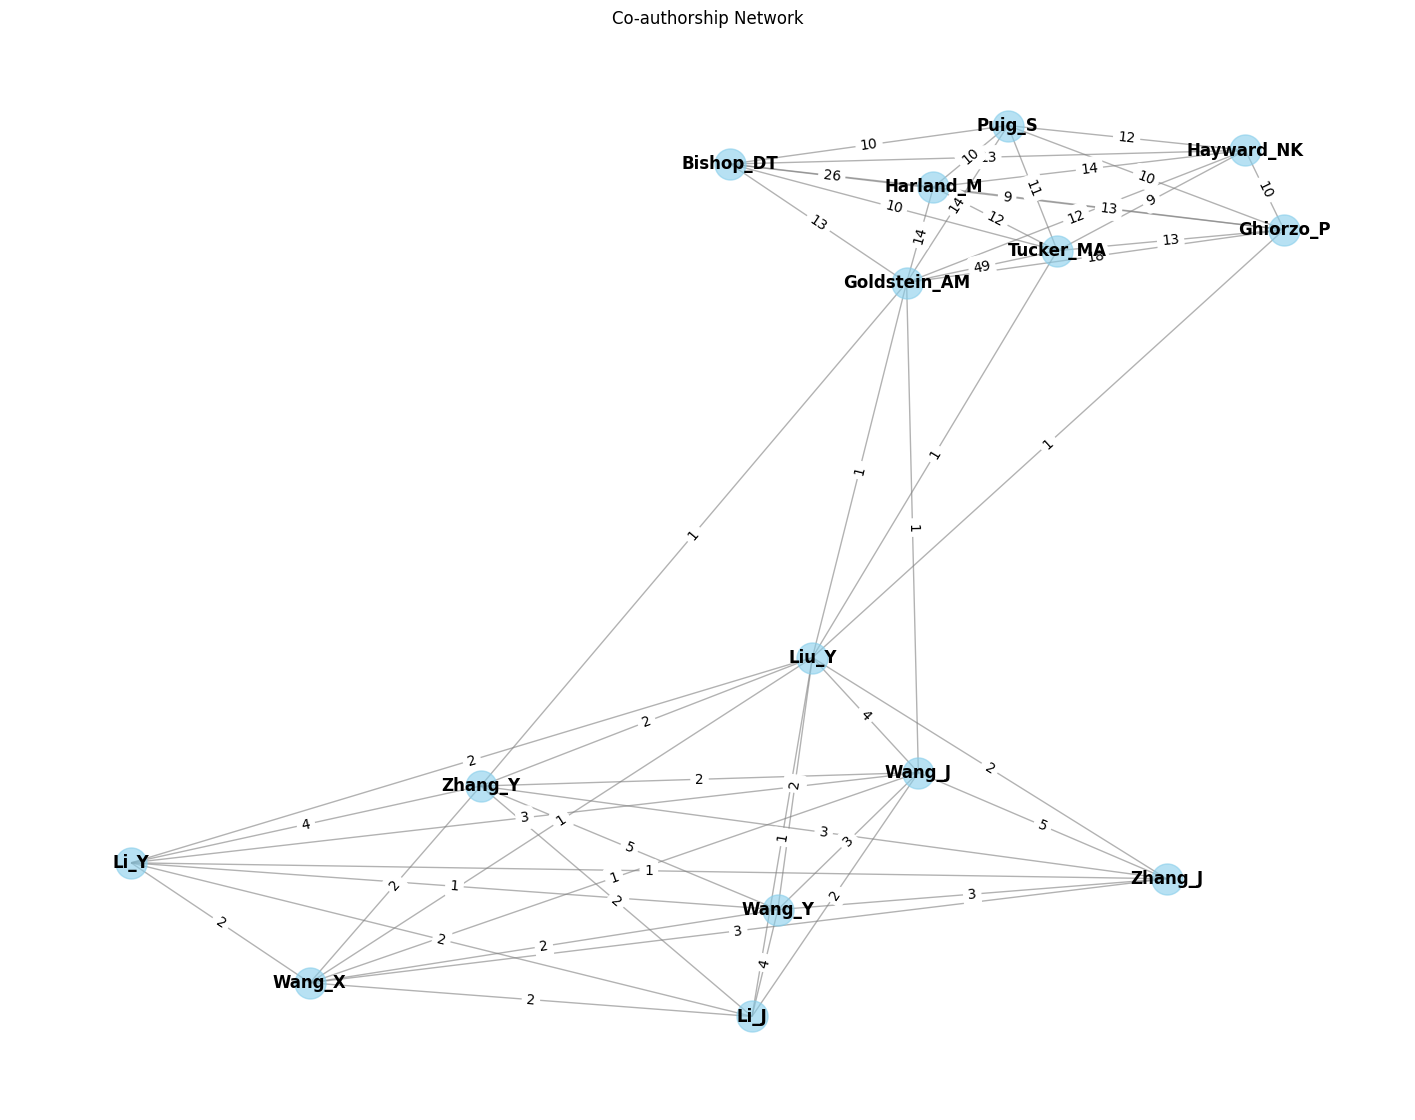

In [330]:
# create a graph
collaboration_network = nx.Graph()

# loop through your dataframe to add lines between researchers
for _, row in df_coauthored.iterrows():
    author1 = row['Author 1']
    author2 = row['Author 2']
    # add number of papers they co-authored
    num_papers = len(row['Co-authored Papers'])

    collaboration_network.add_edge(author1, author2, weight=num_papers)

# draw the network
plt.figure(figsize=(18, 14))
pos = nx.spring_layout(collaboration_network, k=0.5)
nx.draw_networkx_nodes(collaboration_network, pos, node_size=500, node_color="skyblue", alpha=0.6)
nx.draw_networkx_edges(collaboration_network, pos, width=1.0, alpha=0.6, edge_color="gray")
nx.draw_networkx_labels(collaboration_network, pos, font_size=12, font_weight='bold')

edge_labels = nx.get_edge_attributes(collaboration_network, 'weight')
nx.draw_networkx_edge_labels(collaboration_network, pos, edge_labels=edge_labels)

plt.title("Co-authorship Network")
plt.axis("off")
plt.show()


In [331]:
# The list of authors that has not colloborated with the papers in common
df_no_coauthored

,Author 1,Author 2,Co-authored Papers
0,Goldstein_AM,Wang_Y,0
1,Goldstein_AM,Li_J,0
2,Goldstein_AM,Li_Y,0
3,Goldstein_AM,Wang_X,0
4,Goldstein_AM,Zhang_J,0
5,Wang_Y,Tucker_MA,0
6,Wang_Y,Hayward_NK,0
7,Wang_Y,Ghiorzo_P,0
8,Wang_Y,Bishop_DT,0
9,Wang_Y,Puig_S,0


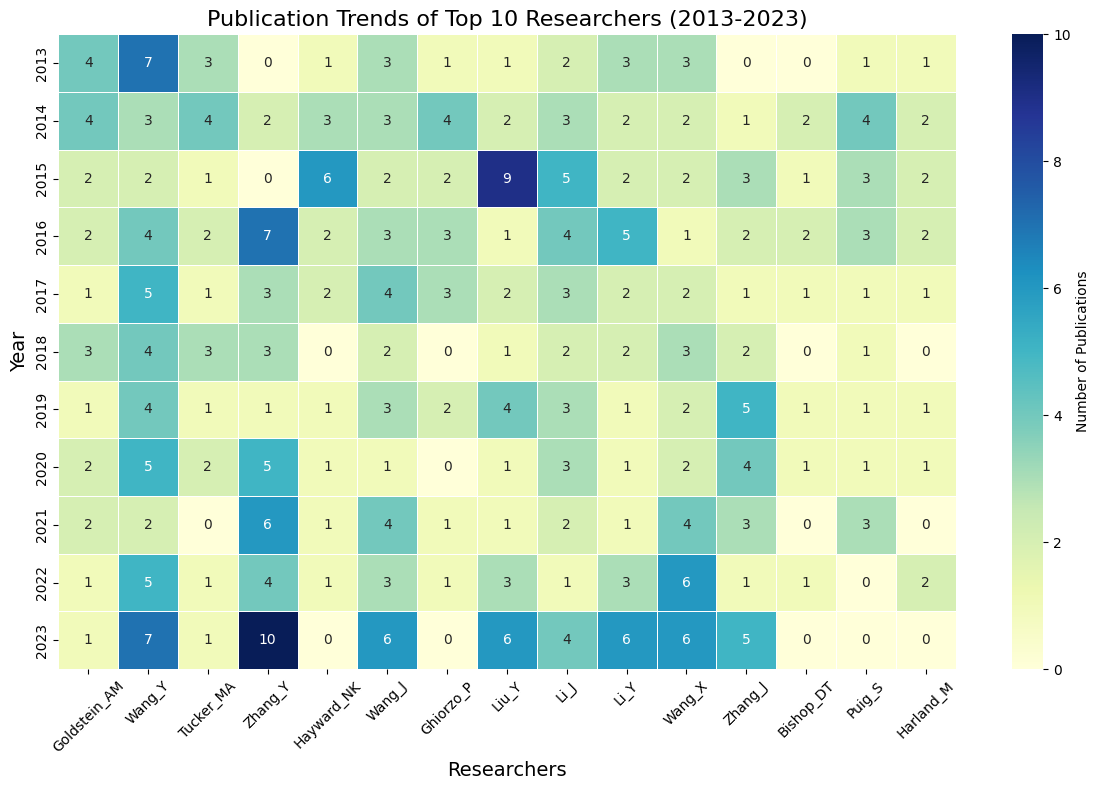

In [332]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of papers each researcher has been involved in
author_counts = merged_df['ResearcherID'].value_counts().reset_index()
author_counts.columns = ['ResearcherID', 'Count']
# Sort into descending order
author_counts = author_counts.sort_values(by='Count', ascending=False)
most_published_authors = author_counts.head(15)

# Extract the top 15 authors
top_15_authors = most_published_authors['ResearcherID'].tolist()

# Further filter data for the years 2014-2024
filtered_data = merged_df[(merged_df['Year'] >= 2013) & (merged_df['Year'] <= 2023)]

# Filter the data to include only the top 15 authors
top_authors_data = filtered_data[filtered_data['ResearcherID'].isin(top_15_authors)]

# Group by Year and ResearcherID, and count publications
yearly_publications = (
    top_authors_data.groupby(['Year', 'ResearcherID'])
    .size()
    .reset_index(name='PublicationCount')
)

# Pivot the data for easier plotting
pivot_data = yearly_publications.pivot(index='Year', columns='ResearcherID', values='PublicationCount').fillna(0)

# Add missing researchers with zero publications for all years in the range
for researcher in top_15_authors:
    if researcher not in pivot_data.columns:
        pivot_data[researcher] = 0

# Re-sort the columns to maintain the order of top 10 authors
pivot_data = pivot_data[top_15_authors]

# Create a heatmap for publication trends
plt.figure(figsize=(12, 8))
heatmap_data = pivot_data

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt="g",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={"label": "Number of Publications"}
)

# Customizing the plot
plt.title("Publication Trends of Top 10 Researchers (2013-2023)", fontsize=16)
plt.xlabel("Researchers", fontsize=14)
plt.ylabel("Year", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the heatmap
plt.show()


### Topic development over time

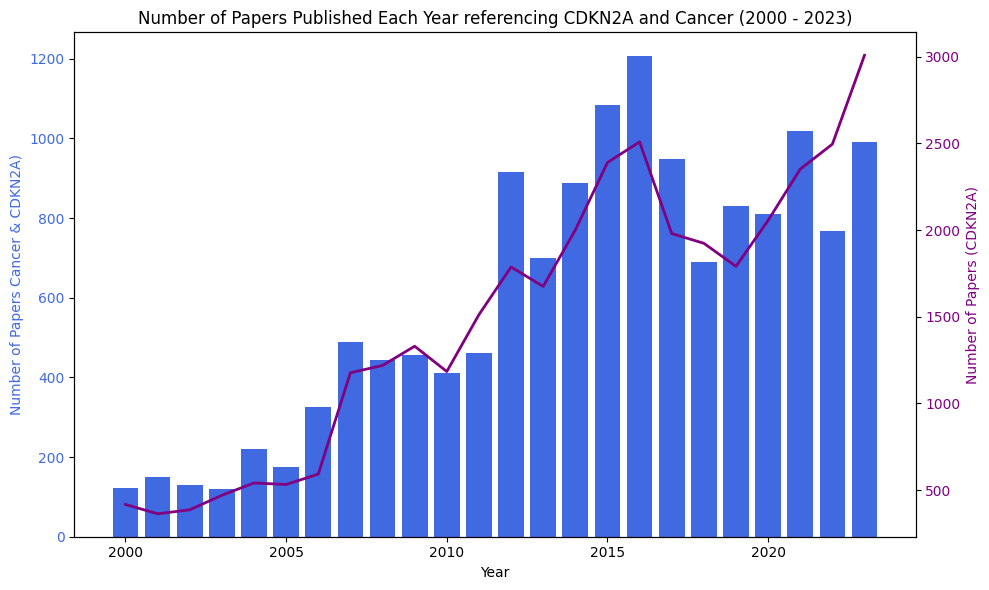

In [333]:
#using the merged_df to count the number of publications per year
filtered_paper_counts = merged_df.groupby('Year').size().reset_index(name = 'Count')
# filter only years 2000 - 2023
filtered_paper_counts = filtered_paper_counts[(filtered_paper_counts['Year'] >= 2000)& (filtered_paper_counts['Year'] <= 2023)]
# count the number of papers per year in the dataframe of cancer related papers
# Filter data for rows where 'Abstract' contains the word 'cancer'
cancer_rows = merged_df[merged_df['Abstract'].str.contains('cancer', case=False, na=False)]
cancer_paper_counts = cancer_rows.groupby('Year').size().reset_index(name='Count')
# filter only years 2000 -2023
cancer_paper_counts = cancer_paper_counts[(cancer_paper_counts['Year'] >= 2000)& (cancer_paper_counts['Year'] <= 2023)]


combined_counts, ax1 = plt.subplots(figsize=(10, 6))
# plot the bar chart for cancer paper counts
ax1.bar(cancer_paper_counts['Year'], cancer_paper_counts['Count'], color='royalblue', label='CDKN2A and Cancer', width=0.8)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Papers Cancer & CDKN2A)', color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')

# create a second y-axis for the line chart
ax2 = ax1.twinx()
ax2.plot(filtered_paper_counts['Year'], filtered_paper_counts['Count'], color='purple', label='CDKN2A', linewidth=2)
ax2.set_ylabel('Number of Papers (CDKN2A)', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# add the title and show the plot
plt.title('Number of Papers Published Each Year referencing CDKN2A and Cancer (2000 - 2023)')
combined_counts.tight_layout()
plt.show()


In [334]:
top_researchers = merged_df[merged_df['ResearcherID'].isin(top_15_authors)]

# Group by ResearcherID and JournalName, then count publications
researcher_journal_counts = top_researchers.groupby(['ResearcherID', 'Journal'])['PMID'].count().reset_index(name='Count')

# Sort by PublicationCount in descending order
researcher_journal_counts = researcher_journal_counts.sort_values(by=['ResearcherID', 'Count'], ascending=[True, False])

# Get the top journal for each researcher
top_journals_by_researcher = researcher_journal_counts.groupby('ResearcherID').first().reset_index()

top_journals_df = top_journals_by_researcher[['ResearcherID', 'Journal', 'Count']]

print("Top Journals by Publication Count for Top Researchers:")
display(top_journals_df)



Top Journals by Publication Count for Top Researchers:


,ResearcherID,Journal,Count
0,Bishop_DT,"Genes, chromosomes & cancer",4
1,Ghiorzo_P,Melanoma research,4
2,Goldstein_AM,The Journal of investigative dermatology,6
3,Harland_M,"Genes, chromosomes & cancer",5
4,Hayward_NK,"Genes, chromosomes & cancer",4
5,Li_J,Oncotarget,4
6,Li_Y,Nature genetics,3
7,Liu_Y,Nature communications,3
8,Puig_S,Journal of the American Academy of Dermatology,5
9,Tucker_MA,The Journal of investigative dermatology,6


In [335]:
# Combine author and first author affiliations
cancer_rows['AllAffiliations'] = (
    cancer_rows['AuthorAffiliation'].fillna('') + ' ' + cancer_rows['FirstAuthorAffiliation'].fillna('')
)

# Count publications by institutions
top_institutions = cancer_rows['AllAffiliations'].value_counts().head(10)

top_institutions_df = top_institutions.reset_index()
top_institutions_df.columns = ['Institution', 'PublicationCount']

print("Top Institutions by Publication Count:")
display(top_institutions_df)

Top Institutions by Publication Count:


<ipython-input-335-6e601d68f53a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer_rows['AllAffiliations'] = (


,Institution,PublicationCount
0,"Centre for Cancer Genetic Epidemiology, Depar...",180
1,"Epidemiology Research Program, American Cance...",125
2,"The Kinghorn Cancer Centre, 370 Victoria Stre...",125
3,"Genetic Epidemiology Branch, Division of Canc...",76
4,"International Agency for Research on Cancer, ...",65
5,Unknown,60
6,"Translational Research Laboratories, Universi...",43
7,"Université Pierre et Marie Curie-Paris 6, Cen...",39
8,"Department of Genetics and Pathology, Interna...",38
9,"Cancer Genome Project, Wellcome Trust Sanger ...",35


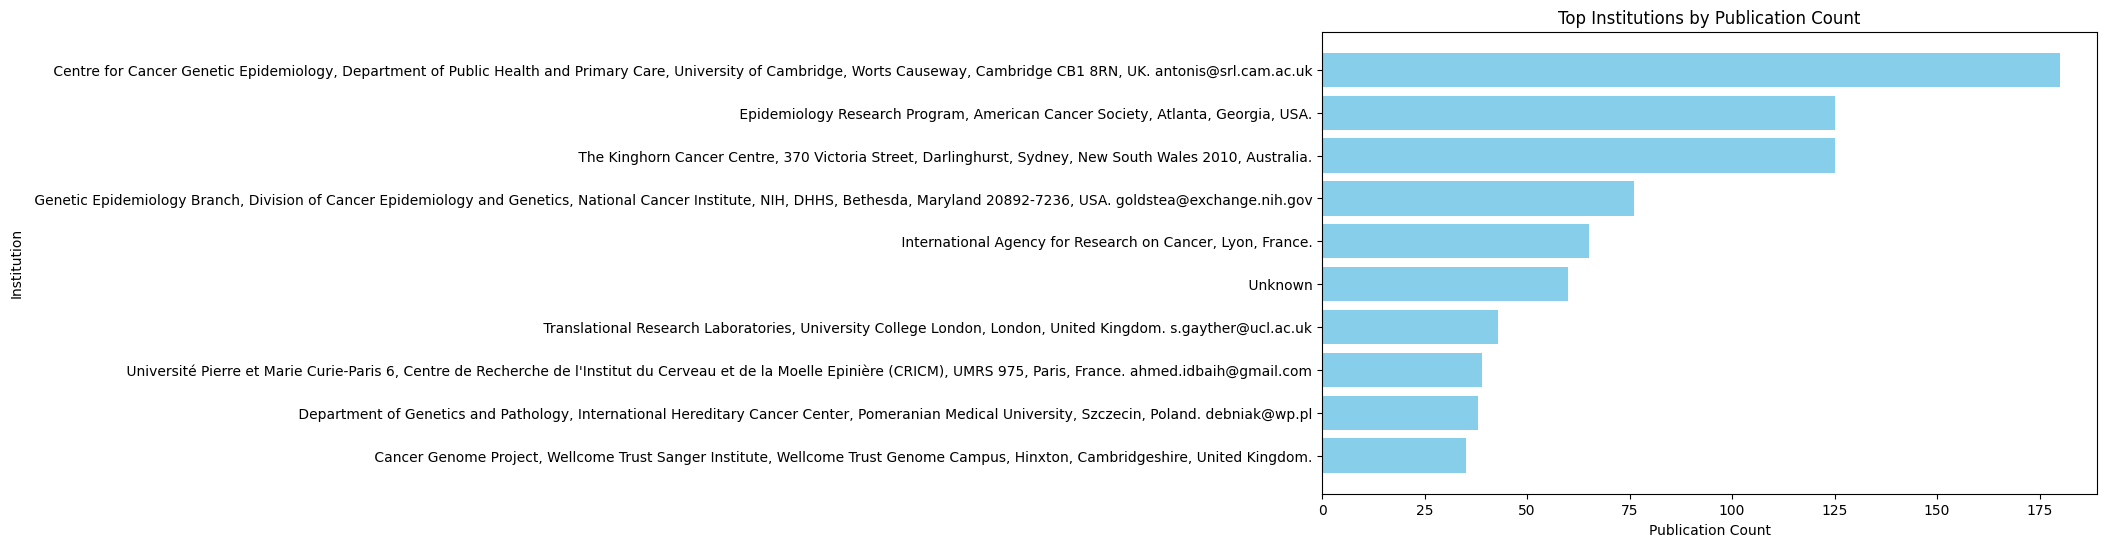

In [336]:
#Top Institutions by Publication Count

plt.figure(figsize=(10, 6))
plt.barh(top_institutions_df['Institution'], top_institutions_df['PublicationCount'], color='skyblue')
plt.title('Top Institutions by Publication Count')
plt.xlabel('Publication Count')
plt.ylabel('Institution')

plt.gca().invert_yaxis()
plt.show()

Number of rows where 'Abstract' contains the word 'cancer': 14370


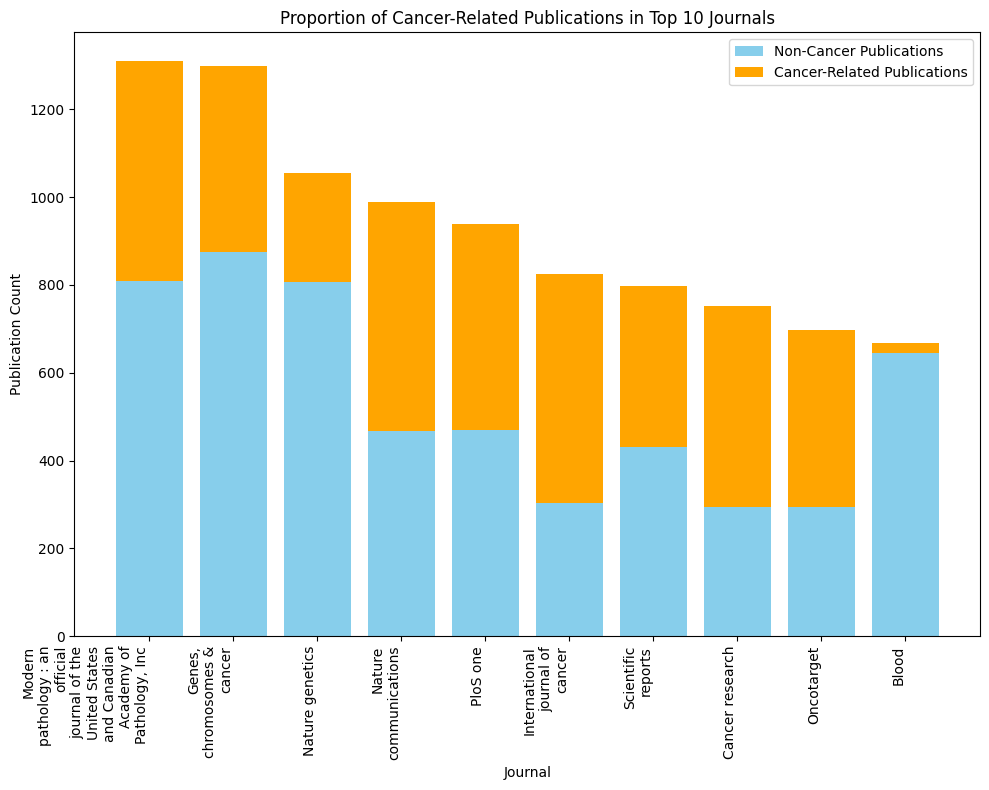

In [337]:
# create a dataframe with only papers which have 'cancer' in their abstracts
cancer_rows = merged_df[merged_df['Abstract'].str.contains('cancer', case=False, na=False)]

# print the number of rows where the abstract contains the word cancer
cancer_count = cancer_rows.shape[0]
print(f"Number of rows where 'Abstract' contains the word 'cancer': {cancer_count}")

# group the original dataframe by 'journal' and count the number of publications
journals = merged_df.groupby('Journal').size().reset_index(name='Count')
# sort by the count in descending order
journals = journals.sort_values(by='Count', ascending=False)


# compare with cancer top journals
# calculate the number of cancer-related publications per journal
cancer_journals = cancer_rows.groupby('Journal').size().reset_index(name='Cancer Publications Count')
cancer_journals = cancer_journals.sort_values(by='Cancer Publications Count', ascending=False)
top_cancer_journals = cancer_journals.head(20)


# Select the top 10 journals for all publications
# The error was here: 'top_journals' was not defined. Changed to 'journals'
top_10_journals = journals.head(10)

# Merge the top 10 most published journals with the cancer journals dataframes
merged_journals = top_10_journals.merge(
    cancer_journals, on='Journal', how='left').fillna(0)



# Extract the journal names, total publication counts and cancer-relatetd publication counts
journals = merged_journals['Journal']
all_counts = merged_journals['Count']
cancer_counts = merged_journals['Cancer Publications Count']
# calculate non cancer-related publications
non_cancer_counts = all_counts - cancer_counts

# create a bar plot showing the total number of publications and cancer publications for the top journals
x = np.arange(len(journals))

fig, ax = plt.subplots(figsize=(10, 8))

# Stacked bars: showing cancer related-publications and non
ax.bar(x, non_cancer_counts, label='Non-Cancer Publications', color='skyblue')
ax.bar(x, cancer_counts, bottom=non_cancer_counts, label='Cancer-Related Publications', color='orange')

# wrap text for long journal names
import textwrap
wrapped_labels = [textwrap.fill(label, width=15) for label in journals]

# add x and y axis labels and a title
ax.set_xlabel('Journal')
ax.set_ylabel('Publication Count')
ax.set_title('Proportion of Cancer-Related Publications in Top 10 Journals')
ax.set_xticks(x)
ax.set_xticklabels(wrapped_labels, rotation=90, ha='right')
ax.legend()

# angle the x axis labels
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

# Show the chart
plt.tight_layout()
plt.show()

<ipython-input-338-40b70ffdc6b7>:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


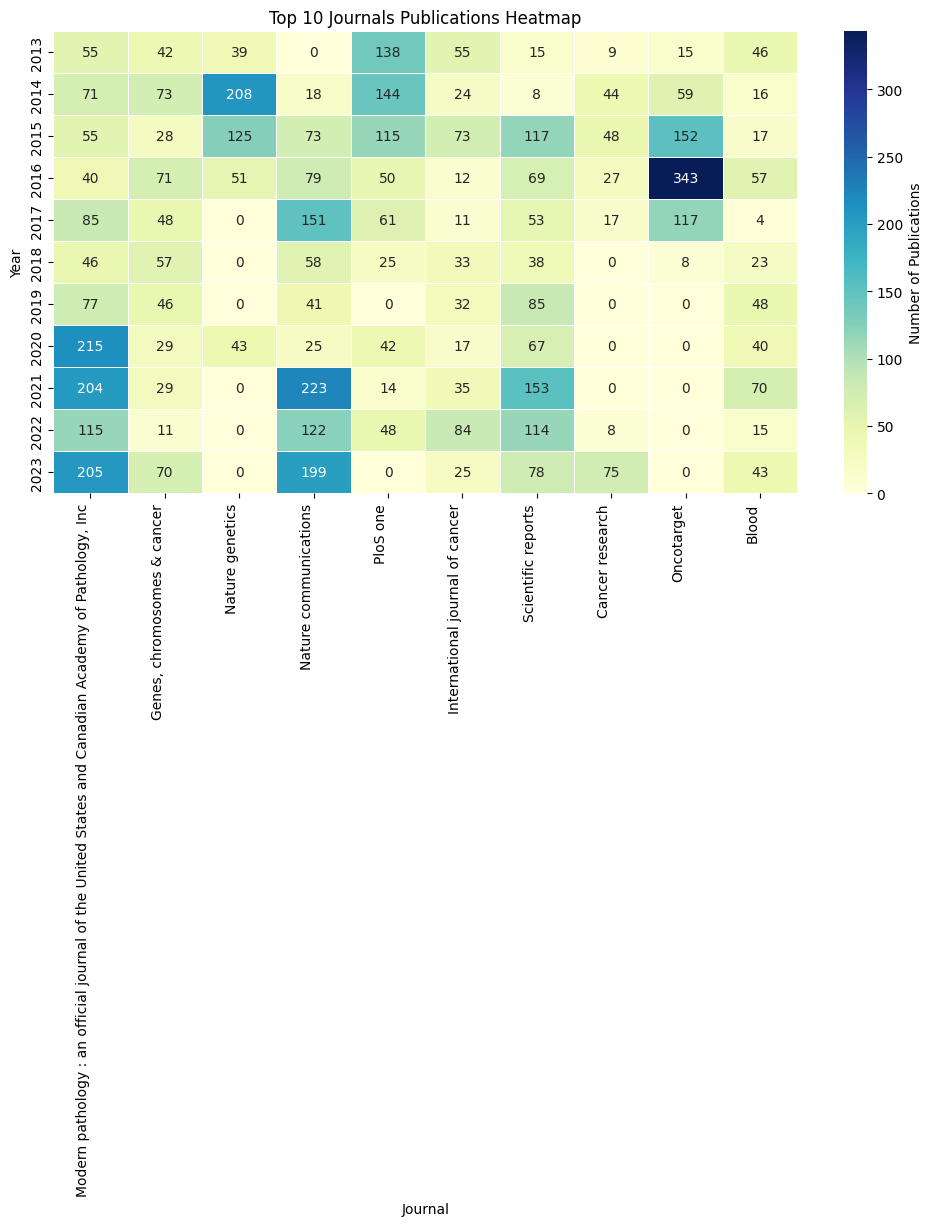

In [338]:
# group the merged dataframe by 'Journal' and 'Year' and count the number of publications for wach
# this gives us the number of publications per journal per year
journal_years = merged_df.groupby(['Journal', 'Year']).size().reset_index(name='Count')
# filter this dataframe to include only the rows where the 'Journal' is in the top 10 most published journals
top_journal_years = journal_years[journal_years['Journal'].isin(top_10_journals['Journal'])]
# futher filter by only including publications from the years 2013 to 2023
top_journal_years = top_journal_years[(top_journal_years['Year'] >= 2013) & (top_journal_years['Year'] <= 2023)]
# pivot the dataframe so that 'Year' becomes the index
pivot_journal_years = top_journal_years.pivot_table(index='Year', columns='Journal', values='Count', aggfunc='sum').fillna(0)

# reorder data to match bar chart
order_journals = top_10_journals['Journal'].tolist()
pivot_journal_years = pivot_journal_years.reindex(columns=order_journals)

# create a heatmap with the pivoted data showing the numbe rof publications per journal per year
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_journal_years, cmap="YlGnBu", annot=True, fmt="g", cbar_kws={'label': 'Number of Publications'}, linewidths=0.5)
# add a title and axis labels to plot
plt.title('Top 10 Journals Publications Heatmap')
plt.xlabel('Journal')
plt.ylabel('Year')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

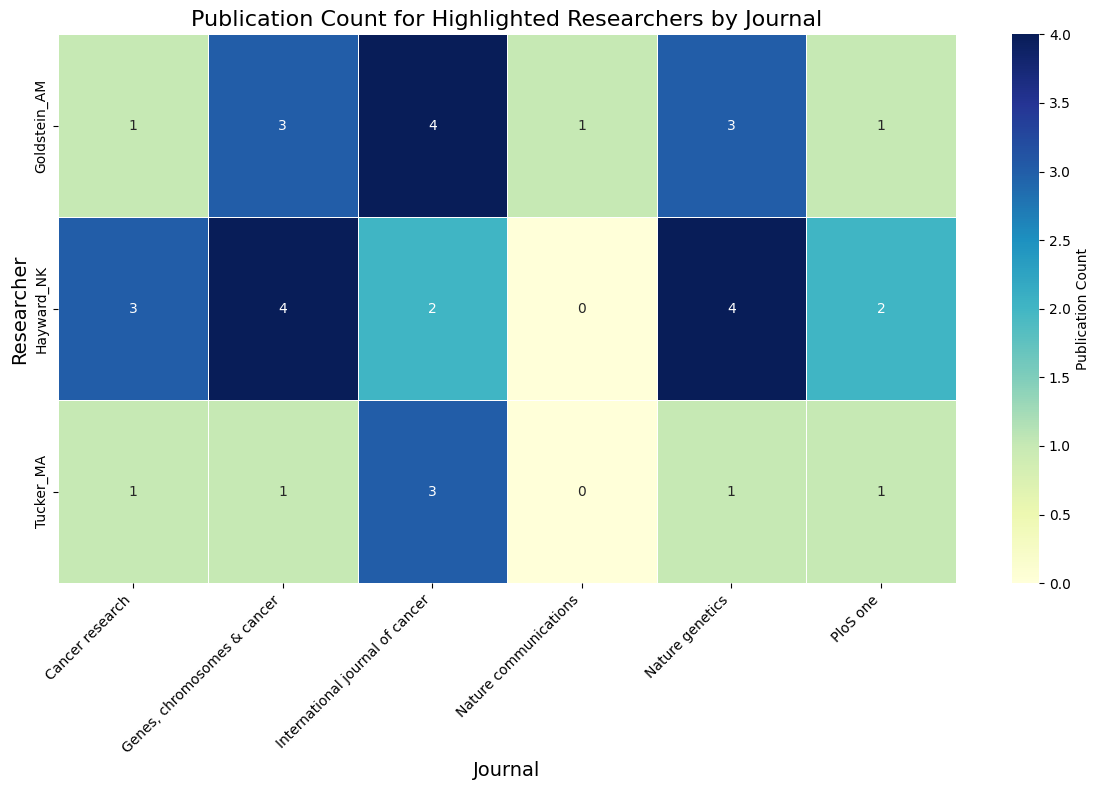

In [339]:
#Top 3 Researchers Based on the Publication Count and Journal

highlighted_researchers = ['Goldstein_AM', 'Tucker_MA', 'Hayward_NK']

author_journal_counts = merged_df.groupby(['ResearcherID', 'Journal']).size().reset_index(name='Publication Count')
author_journal_counts = author_journal_counts.sort_values(by=['ResearcherID', 'Publication Count'], ascending=[True, False])
author_journal_counts = author_journal_counts[author_journal_counts['ResearcherID'].isin(highlighted_researchers)]
filtered_author_journal_counts = author_journal_counts[author_journal_counts['Journal'].isin(top_10_journals['Journal'])]

# Create a pivot table for the heatmap
filtered_author_journal_counts

plt.figure(figsize=(12, 8))
sns.heatmap(
    filtered_author_journal_counts.pivot(index='ResearcherID', columns='Journal', values='Publication Count').fillna(0),
    annot=True,
    fmt="g",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={"label": "Publication Count"}
)

plt.title('Publication Count for Highlighted Researchers by Journal', fontsize=16)
plt.xlabel('Journal', fontsize=14)
plt.ylabel('Researcher', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Focusing on CDKN2A**

In [340]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for CDKN2A-related research
cdkn2a_researchers = merged_df[merged_df['Abstract'].str.contains('CDKN2A', case=False, na=False)]

#Group by ResearcherID and count publications
researcher_counts = cdkn2a_researchers['ResearcherID'].value_counts().reset_index()
researcher_counts.columns = ['ResearcherID', 'PublicationCount']

#Sort by PublicationCount in descending order
researcher_counts = researcher_counts.sort_values(by='PublicationCount', ascending=False)

#Display the top researchers
top_researchers = researcher_counts.head(10)  # Adjust the number as needed
print("Top Researchers focusing on CDKN2A:")
display(top_researchers)


Top Researchers focusing on CDKN2A:


,ResearcherID,PublicationCount
0,Goldstein_AM,61
1,Wang_Y,54
2,Tucker_MA,48
3,Hayward_NK,43
4,Zhang_Y,42
5,Wang_J,39
6,Ghiorzo_P,38
7,Li_J,36
8,Liu_Y,36
9,Wang_X,34


<ipython-input-341-b7abeea98876>:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('viridis', len(researchers))
<ipython-input-341-b7abeea98876>:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


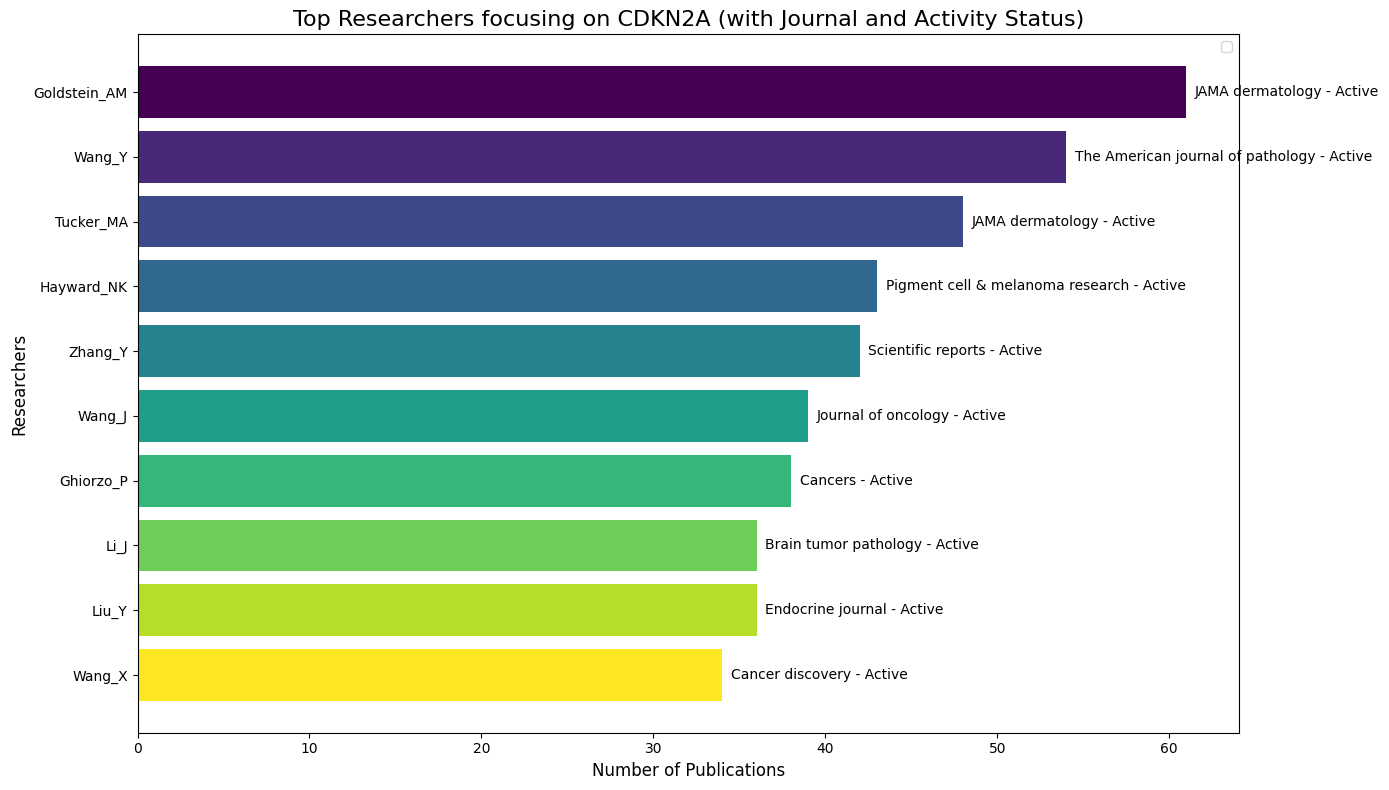

In [341]:
import matplotlib.cm as cm

# Filter for CDKN2A-related research and top researchers
cdkn2a_top_researchers = merged_df[
    (merged_df['Abstract'].str.contains('CDKN2A', case=False, na=False)) &
    (merged_df['ResearcherID'].isin(top_researchers['ResearcherID']))
]

# Group by ResearcherID and get the most recent publication and publication count
recent_publications = cdkn2a_top_researchers.loc[
    cdkn2a_top_researchers.groupby('ResearcherID')['Year'].idxmax()
]
recent_publications['PublicationCount'] = cdkn2a_top_researchers.groupby('ResearcherID')['PMID'].transform('count')

# Check for recent activity (e.g., publications in the last 5 years)
recent_publications['CurrentlyActive'] = recent_publications['Year'] >= (recent_publications['Year'].max() - 5)

# Sort by PublicationCount in descending order
recent_publications = recent_publications.sort_values(by='PublicationCount', ascending=False)

# Prepare data for plotting
researchers = recent_publications['ResearcherID'].tolist()
journals = recent_publications['Journal'].tolist()
publication_counts = recent_publications['PublicationCount'].tolist()
active_status = recent_publications['CurrentlyActive'].tolist()

colors = cm.get_cmap('viridis', len(researchers))

# Create the horizontal bar chart with annotations and colors
fig, ax = plt.subplots(figsize=(14, 8))

y_pos = np.arange(len(researchers))
bars = ax.barh(y_pos, publication_counts, color=[colors(i) for i in range(len(researchers))])

# Annotate bars with journal names and activity status
for i, (journal, active) in enumerate(zip(journals, active_status)):
    annotation_text = f"{journal} - {'Active' if active else 'Inactive'}"
    ax.text(publication_counts[i] + 0.5, y_pos[i], annotation_text, va='center', fontsize=10)

# Customize the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(researchers)
ax.set_xlabel('Number of Publications', fontsize=12)
ax.set_ylabel('Researchers', fontsize=12)
ax.set_title('Top Researchers focusing on CDKN2A (with Journal and Activity Status)', fontsize=16)
ax.legend()
ax.invert_yaxis()  # Invert y-axis to display researchers from top to bottom
plt.tight_layout()
plt.show()

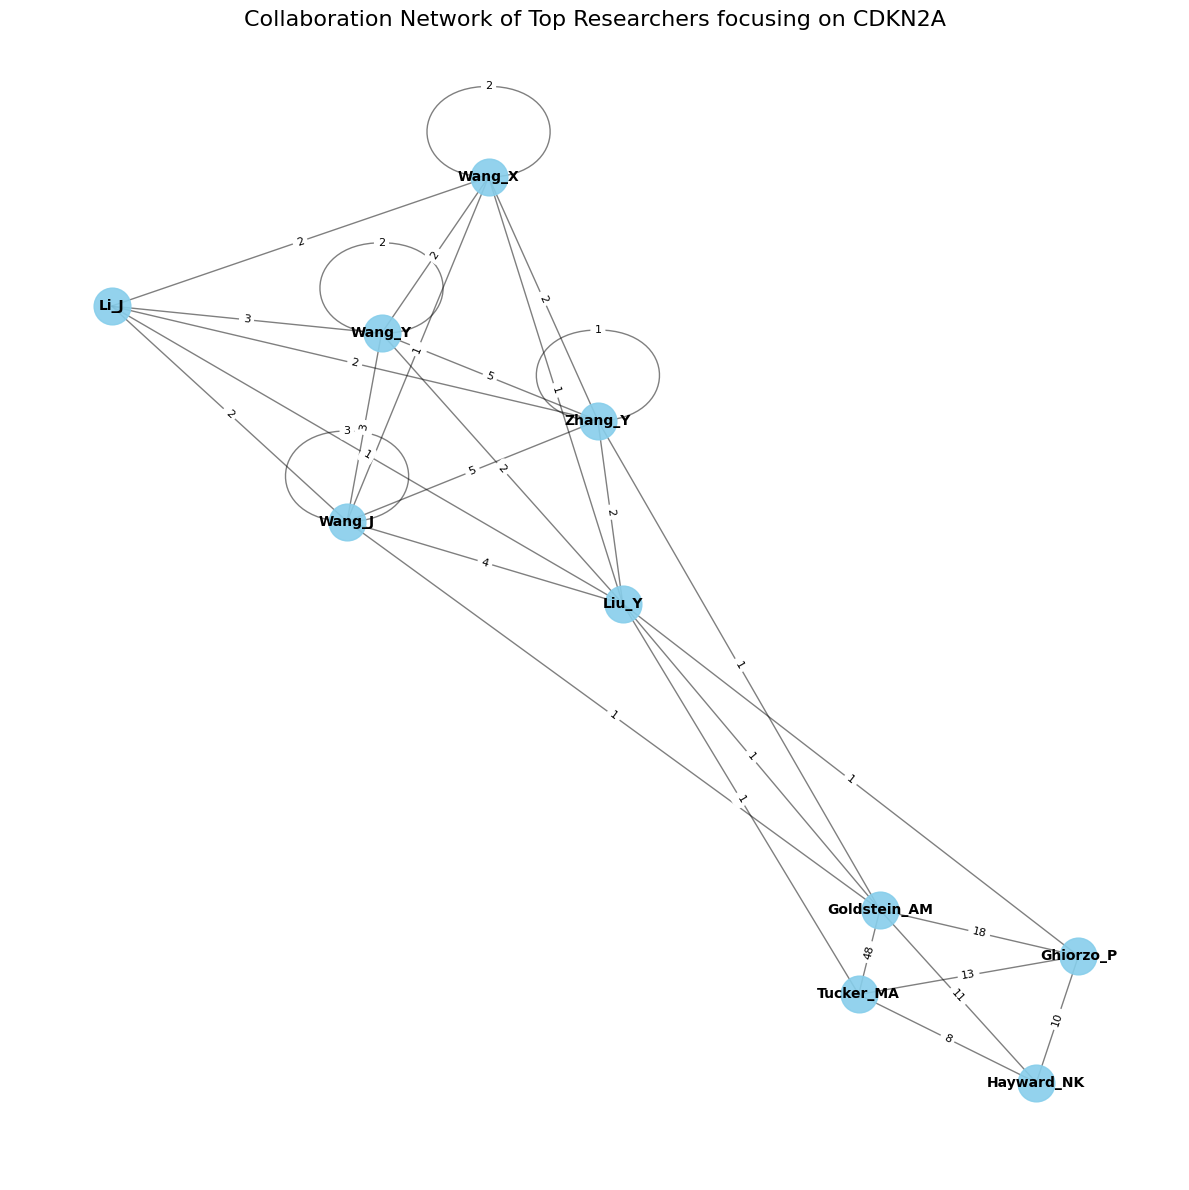

In [342]:
#Group by PMID to identify collaborations
collaboration_data = cdkn2a_top_researchers.groupby('PMID')['ResearcherID'].apply(list).reset_index()

# Generate pairs of collaborators
collaboration_pairs = []
for authors in collaboration_data['ResearcherID']:
    if len(authors) > 1:
        collaboration_pairs.extend(combinations(authors, 2))

# Define collaboration_counts here to make it accessible
from collections import defaultdict # import defaultdict if not already imported
collaboration_counts = defaultdict(int)
for pair in collaboration_pairs:
    collaboration_counts[tuple(sorted(pair))] += 1  # Sort to avoid duplicates

# Create the network graph with edge weights
collaboration_graph = nx.Graph()
for pair, count in collaboration_counts.items():
    collaboration_graph.add_edge(pair[0], pair[1], weight=count)

# Visualize the collaboration network with edge labels
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(collaboration_graph, k=0.5)  # Adjust k for node spacing

nx.draw_networkx_nodes(collaboration_graph, pos, node_size=700, node_color="skyblue", alpha=0.9)
nx.draw_networkx_edges(collaboration_graph, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(collaboration_graph, pos, font_size=10, font_weight='bold')

# Add edge labels for the number of co-authored papers
edge_labels = nx.get_edge_attributes(collaboration_graph, 'weight')
nx.draw_networkx_edge_labels(collaboration_graph, pos, edge_labels=edge_labels, font_size=8)

plt.title("Collaboration Network of Top Researchers focusing on CDKN2A", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

In [343]:
import networkx as nx
from itertools import combinations
from collections import defaultdict

# Identify Collaborations
collaboration_data = cdkn2a_top_researchers.groupby('PMID')['ResearcherID'].apply(list).reset_index()
collaboration_pairs = []
for authors in collaboration_data['ResearcherID']:
    if len(authors) > 1:
        collaboration_pairs.extend(combinations(authors, 2))

collaboration_counts = defaultdict(int)
for pair in collaboration_pairs:
    collaboration_counts[tuple(sorted(pair))] += 1

#Identify Non-Competing Researchers
top_researchers = list(cdkn2a_top_researchers['ResearcherID'].unique())
non_collaborating_pairs = []
for researcher1, researcher2 in combinations(top_researchers, 2):
    if tuple(sorted((researcher1, researcher2))) not in collaboration_counts:
        non_collaborating_pairs.append((researcher1, researcher2))

# Filter for Currently Active Researchers (Published in last 5 years)
recent_publications = cdkn2a_top_researchers[cdkn2a_top_researchers['Year'] >= (cdkn2a_top_researchers['Year'].max() - 5)]
active_researchers = recent_publications['ResearcherID'].unique()

# Find Non-Competing and Active Researchers
non_competing_active_researchers = []
for researcher1, researcher2 in non_collaborating_pairs:
    if researcher1 in active_researchers and researcher2 in active_researchers:
        non_competing_active_researchers.extend([researcher1, researcher2])

# Calculate Publication Counts
publication_counts = cdkn2a_top_researchers['ResearcherID'].value_counts().to_dict()

#Sort Non-Competing and Active Researchers by Publication Count
non_competing_active_researchers_sorted = sorted(
    set(non_competing_active_researchers),  # Convert to set to remove duplicates
    key=lambda researcher: publication_counts.get(researcher, 0),
    reverse=True
)

#Select Top Three
top_three_non_competing_active_highly_published = non_competing_active_researchers_sorted[:3]

print("Top Three Non-Competing, Active, and Highly Published Researchers:", top_three_non_competing_active_highly_published)

Top Three Non-Competing, Active, and Highly Published Researchers: ['Goldstein_AM', 'Wang_Y', 'Tucker_MA']


In [344]:
# Filter data for highlighted researchers
highlighted_researchers = ['Goldstein_AM', 'Wang_Y', 'Tucker_MA']
filtered_data = merged_df[merged_df['ResearcherID'].isin(highlighted_researchers)]

#Group by PMID to identify collaborations
collaboration_data = filtered_data.groupby('PMID')['ResearcherID'].apply(list).reset_index()

# Get unique lists of collaborators
# (convert lists to tuples to make them hashable for drop_duplicates)
collaboration_data['ResearcherID'] = collaboration_data['ResearcherID'].apply(tuple)
collaboration_data = collaboration_data.drop_duplicates(subset=['ResearcherID'])
collaboration_data['ResearcherID'] = collaboration_data['ResearcherID'].apply(list) # Convert back to lists if needed

# Check for collaborations within the highlighted group
collaborations_found = False
for authors in collaboration_data['ResearcherID']:
    if len(authors) > 1 and all(author in highlighted_researchers for author in authors):
        collaborations_found = True
        print(f"Collaboration found in PMID: {collaboration_data.loc[collaboration_data['ResearcherID'].apply(lambda x: set(x) == set(authors)), 'PMID'].values[0]}, Authors: {authors}")

if not collaborations_found:
    print("No direct collaborations found between the highlighted researchers.")

Collaboration found in PMID: 10738302, Authors: ['Goldstein_AM', 'Tucker_MA']
Collaboration found in PMID: 10738302, Authors: ['Tucker_MA', 'Goldstein_AM']
Collaboration found in PMID: 19383911, Authors: ['Wang_Y', 'Wang_Y']


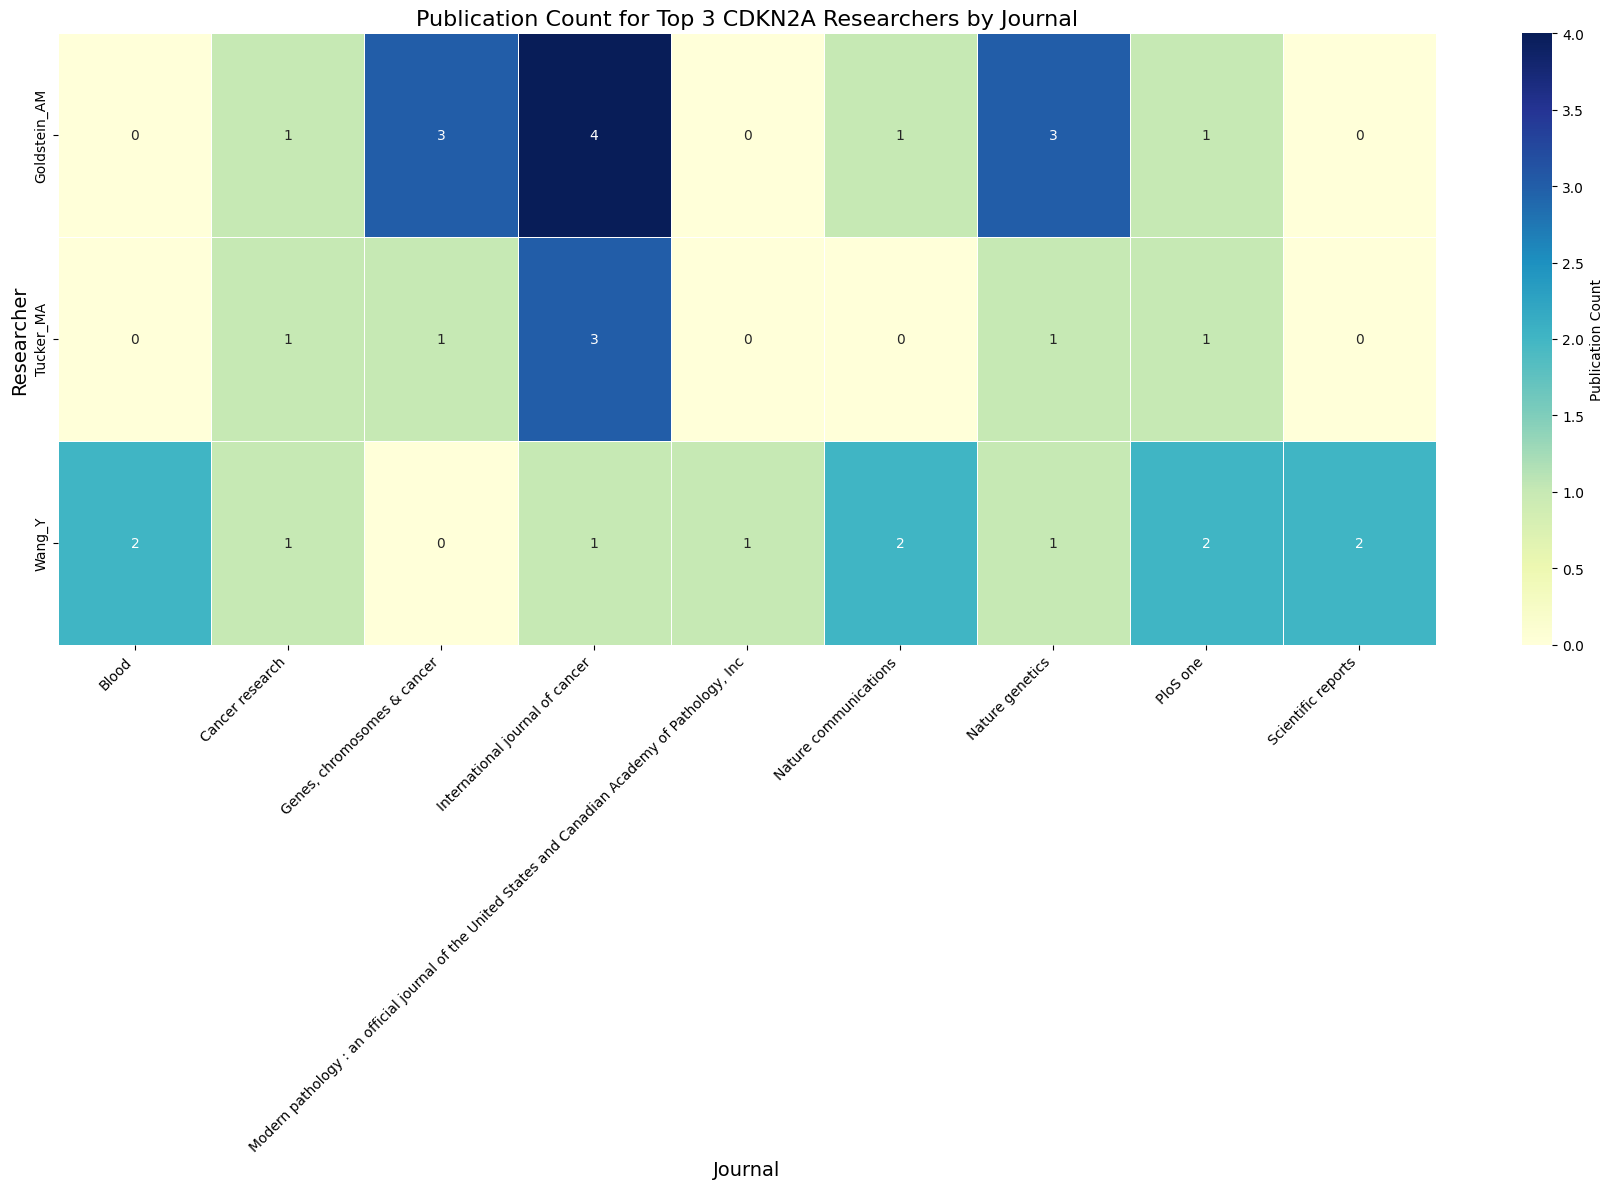

In [345]:

# Define the top 3 researchers
highlighted_researchers = ['Goldstein_AM', 'Wang_Y', 'Tucker_MA']

# Group by ResearcherID and Journal, then count publications
author_journal_counts = cdkn2a_top_researchers.groupby(['ResearcherID', 'Journal']).size().reset_index(name='Publication Count')

# Sort by Publication Count in descending order
author_journal_counts = author_journal_counts.sort_values(by=['ResearcherID', 'Publication Count'], ascending=[True, False])

# Filter for highlighted researchers and top 10 journals
filtered_author_journal_counts = author_journal_counts[
    author_journal_counts['ResearcherID'].isin(highlighted_researchers) &
    author_journal_counts['Journal'].isin(top_10_journals['Journal'])
]

# Create a pivot table for the heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(
    filtered_author_journal_counts.pivot(index='ResearcherID', columns='Journal', values='Publication Count').fillna(0),
    annot=True,
    fmt="g",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={"label": "Publication Count"}
)

plt.title('Publication Count for Top 3 CDKN2A Researchers by Journal', fontsize=16)
plt.xlabel('Journal', fontsize=14)
plt.ylabel('Researcher', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [346]:
# Group by ResearcherID and Journal, then count publications
author_journal_counts = merged_df.groupby(['ResearcherID', 'Journal']).size().reset_index(name='Publication Count')

# Filter for highlighted researchers
filtered_counts = author_journal_counts[author_journal_counts['ResearcherID'].isin(highlighted_researchers)]

# Get top journals for each researcher
top_journals_by_researcher = filtered_counts.groupby('ResearcherID').apply(lambda x: x.nlargest(5, 'Publication Count')).reset_index(drop=True)

# Compare top journals
for researcher1, researcher2 in combinations(highlighted_researchers, 2):
    journals1 = top_journals_by_researcher[top_journals_by_researcher['ResearcherID'] == researcher1]['Journal'].tolist()
    journals2 = top_journals_by_researcher[top_journals_by_researcher['ResearcherID'] == researcher2]['Journal'].tolist()
    common_journals = set(journals1) & set(journals2)
    print(f"Common journals between {researcher1} and {researcher2}: {common_journals}")

Common journals between Goldstein_AM and Wang_Y: set()
Common journals between Goldstein_AM and Tucker_MA: {'International journal of cancer', 'Journal of medical genetics', 'Journal of the American Academy of Dermatology', 'The Journal of investigative dermatology', 'Oncogene'}
Common journals between Wang_Y and Tucker_MA: set()


<ipython-input-346-55e64afc7ea3>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_journals_by_researcher = filtered_counts.groupby('ResearcherID').apply(lambda x: x.nlargest(5, 'Publication Count')).reset_index(drop=True)


In [347]:
highlighted_researchers = ['Goldstein_AM', 'Wang_Y', 'Tucker_MA']

#Filter the data
filtered_data = merged_df[merged_df['ResearcherID'].isin(highlighted_researchers)]

#Group and get unique journals
journal_counts_by_year = filtered_data.groupby(['ResearcherID', 'Year'])['Journal'].unique().reset_index()

# Rename the column and display the results
journal_counts_by_year.rename(columns={'Journal': 'Journals'}, inplace=True)
print(journal_counts_by_year)

    ResearcherID  Year                                           Journals
0   Goldstein_AM  2000  [Genes, chromosomes & cancer, Oncogene, Journa...
1   Goldstein_AM  2001  [British journal of cancer, Genes, chromosomes...
2   Goldstein_AM  2002  [American journal of medical genetics, Melanom...
3   Goldstein_AM  2003     [Oncogene, American journal of human genetics]
4   Goldstein_AM  2004  [Genes, chromosomes & cancer, Human mutation, ...
..           ...   ...                                                ...
56        Wang_Y  2019  [Oncology letters, Scientific reports, RSC adv...
57        Wang_Y  2020  [Carcinogenesis, Modern pathology : an officia...
58        Wang_Y  2021  [Stem cells international, Translational cance...
59        Wang_Y  2022  [Brain pathology (Zurich, Switzerland), BMC ga...
60        Wang_Y  2023  [The American journal of pathology, The oncolo...

[61 rows x 3 columns]


In [348]:
#Currently Active Journal of the top researchers

highlighted_researchers = ['Goldstein_AM', 'Wang_Y', 'Tucker_MA']

#Filter the data for highlighted researchers
filtered_data = merged_df[merged_df['ResearcherID'].isin(highlighted_researchers)]

#Get the most recent publication year for each researcher
recent_years = filtered_data.groupby('ResearcherID')['Year'].max()

#Filter for publications within the last 5 years
recent_publications = filtered_data[filtered_data.apply(lambda row: row['Year'] >= recent_years[row['ResearcherID']] - 5, axis=1)]

#Get the unique journals for each researcher
active_journals_by_researcher = recent_publications.groupby('ResearcherID')['Journal'].unique().reset_index()

#Display the results
print("Journals where researchers are currently active:")
for index, row in active_journals_by_researcher.iterrows():
    print(f"{row['ResearcherID']}: {row['Journal']}")

Journals where researchers are currently active:
Goldstein_AM: ['Genetics in medicine : official journal of the American College of Medical Genetics'
 'The Journal of investigative dermatology' 'Cancer'
 'Journal of the American Academy of Dermatology' 'Nature communications'
 'Journal of gastroenterology' 'JNCI cancer spectrum' 'JAMA dermatology']
Tucker_MA: ['Genetics in medicine : official journal of the American College of Medical Genetics'
 'The Journal of investigative dermatology' 'Cancer'
 'Journal of the American Academy of Dermatology' 'JNCI cancer spectrum'
 'JAMA dermatology']
Wang_Y: ['Journal of cellular biochemistry' 'International journal of cancer'
 'Journal of proteome research' 'Cancer medicine' 'Oncology letters'
 'Carcinogenesis' 'Scientific reports'
 'Modern pathology : an official journal of the United States and Canadian Academy of Pathology, Inc'
 'Blood advances' 'Aging' 'Stem cells international'
 'Brain pathology (Zurich, Switzerland)' 'Translational cancer 